# Simulate Smallbone 2011 model using van Heerden's data

In [2]:
from pyADAPT.sbml.sbml_model import SBMLModel
from pyADAPT.dataset import DataSet
import numpy as np
from pyADAPT.optimize import optimize, Optimizer
import pysnooper
import matplotlib.pyplot as plt

In [3]:
smallbone = SBMLModel("../../data/trehalose/smallbone.xml")

In [4]:
data = DataSet(raw_data_path="../../data/trehalose/smallbone2011_data.mat", data_specs_path="../../data/trehalose/smallbone2011_data.yaml")

In [5]:
smallbone.parameters

,name,value,vary,lb,ub,init
cell,cell,1.00000,False,0.0,inf,1.00000
medium,medium,1.00000,False,0.0,inf,1.00000
heat,heat,0.00000,False,0.0,inf,0.00000
glc_0,glc_0,0.09765,False,0.0,inf,0.09765
g1p_0,g1p_0,0.10000,False,0.0,inf,0.10000
g6p_0,g6p_0,2.67500,False,0.0,inf,2.67500
trh_0,trh_0,0.05000,False,0.0,inf,0.05000
t6p_0,t6p_0,0.02000,False,0.0,inf,0.02000
udg_0,udg_0,0.70000,False,0.0,inf,0.70000
pgi_Vmax,pgi_Vmax,1071.00000,False,-inf,inf,1071.00000


In [7]:
from pyADAPT.examples.trehalose import Smallbone2011
smallbone2 = Smallbone2011()

In [9]:
smallbone2.states

,name,value,observable,init
glc,glc,0.09765,True,0.09765
g1p,g1p,0.10000,True,0.10000
g6p,g6p,2.67500,True,2.67500
trh,trh,0.05000,True,0.05000
t6p,t6p,0.02000,True,0.02000
udg,udg,0.70000,True,0.70000


TypeError: fluxes() missing 3 required positional arguments: 't', 'x', and 'p'

In [12]:
smallbone.reset()
hxk_Vmax_traj, hxk_Vmax_straj, time = optimize(smallbone,
                          data,
                          "hxk_Vmax",
                          n_iter=4,
                          n_tstep=500,
                          n_core=4,
                          init_method=None,
                          verbose=Optimizer.ITER,lamda=5)

TypeError: can't pickle SwigPyObject objects

In [74]:
smallbone2.parameters

,name,value,vary,lb,ub,init
cell,cell,1.000000,False,0.0,inf,1.00000
medium,medium,1.000000,False,0.0,inf,1.00000
heat,heat,0.000000,False,0.0,inf,0.00000
glc_0,glc_0,0.097650,False,0.0,inf,0.09765
g1p_0,g1p_0,0.100000,False,0.0,inf,0.10000
g6p_0,g6p_0,2.675000,False,0.0,inf,2.67500
trh_0,trh_0,0.050000,False,0.0,inf,0.05000
t6p_0,t6p_0,0.020000,False,0.0,inf,0.02000
udg_0,udg_0,0.700000,False,0.0,inf,0.70000
pgi_Vmax,pgi_Vmax,1071.000000,False,-inf,inf,1071.00000


In [19]:
hxk_Vmax_traj.coords

NameError: name 'hxk_Vmax_traj' is not defined

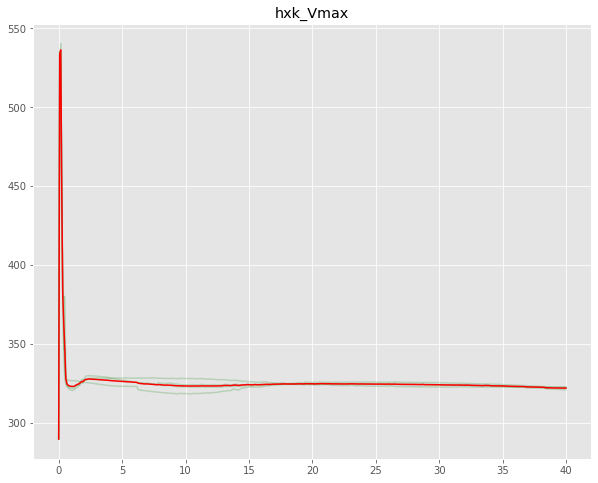

In [90]:
fig, axes = plt.subplots(figsize=(10, 8))
for i in hxk_Vmax_traj.coords['iter']:
    axes.plot(time, hxk_Vmax_traj.loc[i, :, 'hxk_Vmax'], color="green", alpha=0.2)
axes.plot(time, hxk_Vmax_traj.sel(param="hxk_Vmax").mean(dim="iter"), color="red")
axes.set_title("hxk_Vmax")
fig.savefig("hxk_Vmax.png")

In [91]:
straj.coords

Coordinates:
  * iter     (iter) int32 0 1 2 3
  * time     (time) float64 0.0 0.08016 0.1603 0.2405 ... 39.76 39.84 39.92 40.0
  * state    (state) <U2 's1' 's2' 's3' 's4' 's5' 's6'

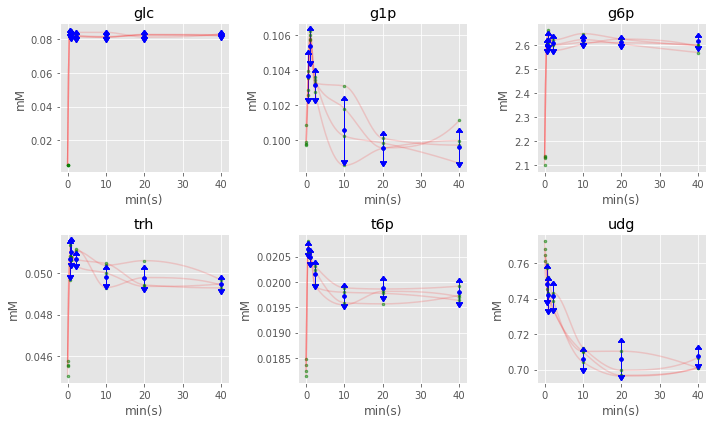

In [97]:
from pyADAPT.dataset import plot_splines
fig, axes = plt.subplots(2, 3, figsize=(10,6))
plot_splines(data, 4, 500, axes=axes)
fig.savefig("hxt_Vmax-data.png")

In [18]:
smallbone2.states[]

,name,value,observable,init
glc,glc,0.09765,True,0.09765
g1p,g1p,0.10000,True,0.10000
g6p,g6p,2.67500,True,2.67500
trh,trh,0.05000,True,0.05000
t6p,t6p,0.02000,True,0.02000
udg,udg,0.70000,True,0.70000


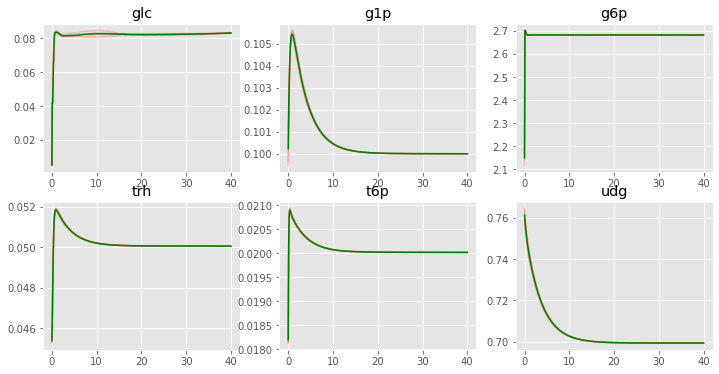

In [94]:
fig, axes= plt.subplots(2, 3, figsize=(12,6))
for a, s in enumerate(hxk_Vmax_straj.coords['state']):
    ax = axes.flatten()[a]
    for i in hxk_Vmax_straj.coords['iter']:
        ax.plot(time, hxk_Vmax_straj.sel(iter=i, state=s), color="red", alpha=0.2)
    #     fig.suptitle(smallbone2.states.index[a])
    ax.set_title(smallbone2.states.index[a])
    ax.plot(time, hxk_Vmax_straj.sel(state=s).mean(dim="iter"), color="green")
fig.savefig("hxk_Vmax-states.png")